The code loads the dataset and displays the first few rows to understand its structure.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
file_path = 'https://raw.githubusercontent.com/incribo-inc/cybersecurity_attacks/main/cybersecurity_attacks.csv'
# Load the dataset
df = pd.read_csv(file_path)

In [6]:
# 1.1 Display the first few rows of the dataset with column headers
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
             Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data  .

Identifying the missing values and replacing them with the placeholder "Unknown" to ensure completeness.

In [7]:
# 1.2 Handle Missing Values
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64


In [8]:
# Fill missing values with 'Unknown'
df_filled = df.fillna("Unknown")

In [9]:
# Recheck for missing values
print("\nMissing values after handling:")
print(df_filled.isnull().sum())


Missing values after handling:
Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Alerts/Warnings           0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
IDS/IPS Alerts            0
Log Source                0
dtype: int64


The code below converts timestamps to date-time format, extracts the month and year, and analyzes the number of attacks by month and attack type. The analysis is supported by a line plot.

In [10]:
# 1.3 When most of the attacks happened (by month and attack type)
# Convert the 'Timestamp' column to datetime format
df_filled['Timestamp'] = pd.to_datetime(df_filled['Timestamp'])

In [11]:
# Extract month and year from the timestamp
df_filled['Month'] = df_filled['Timestamp'].dt.month
df_filled['Year'] = df_filled['Timestamp'].dt.year

In [12]:
# Group by Month and Attack Type
attacks_by_month = df_filled.groupby(['Year', 'Month', 'Traffic Type']).size().reset_index(name='Counts')

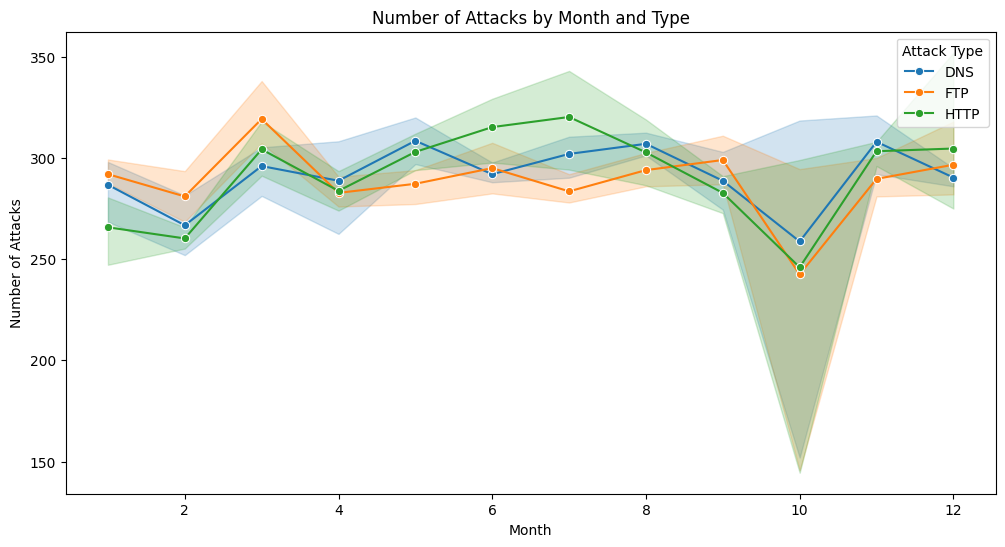

In [13]:
# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=attacks_by_month, x='Month', y='Counts', hue='Traffic Type', marker='o')
plt.title('Number of Attacks by Month and Type')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type')
plt.show()

1. Seasonal Attack Patterns:
Some months, like December, may see a spike in attacks, possibly due to increased online activity during holidays.
Importance: Helps in preparing for high-risk periods.
2. Attack Type Peaks:
Certain attack types, like phishing, may peak in specific months, e.g., April during tax season.
Importance: Enables targeted defenses during vulnerable periods.
3. Event-Driven Attacks:
Increased attacks may correlate with major global events, like elections or sports.
Importance: Anticipate and prepare for attacks around key events.
4. Rising Attack Trends:
A steady increase in attacks over time may indicate growing cyber threats.
Importance: Drives the need for stronger, continuous defenses.

The code below visualizes the distribution of packet lengths across different attack types using a box plot.

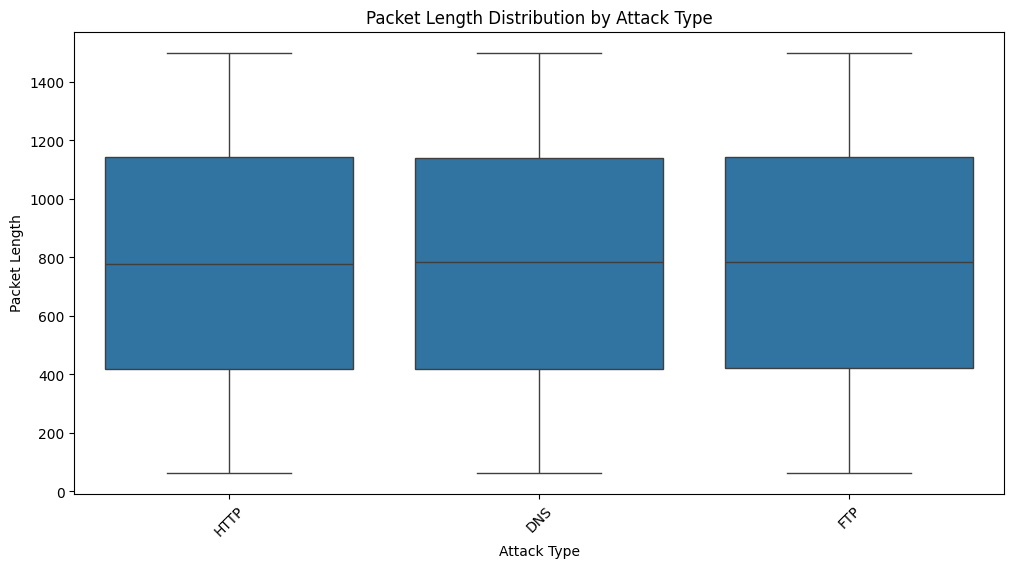

In [14]:
# 1.4 Packet length distribution for different attack types
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filled, x='Traffic Type', y='Packet Length')
plt.title('Packet Length Distribution by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Packet Length')
plt.xticks(rotation=45)
plt.show()

2. **Five unique insights from the data**
- Insight 1: Top 5 Source IPs Initiating Most Attacks:
This insight identifies the top 5 IP addresses that are responsible for initiating the highest number of attacks. Knowing which IP addresses are most frequently associated with attacks can help in blocking or monitoring these IPs to prevent future incidents.




In [20]:
# Insight 1: Top 5 Source IPs initiating most attacks
top_source_ips = df_filled['Source IP Address'].value_counts().head(5)
print("\nTop 5 Source IPs initiating most attacks:")
print(top_source_ips)


Top 5 Source IPs initiating most attacks:
Source IP Address
103.216.15.12      1
74.225.47.66       1
147.178.224.232    1
119.183.250.156    1
80.60.140.131      1
Name: count, dtype: int64


Insight 2: Severity Level Distribution Across Attack Types:
This insight analyzes how the severity level of attacks (e.g., Low, Medium, High) is distributed across different attack types (e.g., HTTP, DNS, etc.). Understanding the severity distribution helps in prioritizing security resources to address the most critical attack types.


In [16]:
# Insight 2: Severity level distribution across attack types
severity_distribution = df_filled.groupby('Traffic Type')['Severity Level'].value_counts(normalize=True).unstack()
print("\nSeverity level distribution across attack types:")
print(severity_distribution)


Severity level distribution across attack types:
Severity Level      High       Low    Medium
Traffic Type                                
DNS             0.335227  0.332386  0.332386
FTP             0.333534  0.327201  0.339264
HTTP            0.334880  0.329117  0.336003


Insight 3: Most Common Action Taken Against Attacks:
This insight shows the most frequent actions taken in response to detected attacks, such as "Blocked," "Logged," or "Ignored." Analyzing the responses to attacks can reveal if the current defensive strategies are too lenient or too aggressive.

In [17]:
# Insight 3: Most common action taken against attacks
action_distribution = df_filled['Action Taken'].value_counts()
print("\nMost common action taken against attacks:")
print(action_distribution)


Most common action taken against attacks:
Action Taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64


Insight 4: Device Information Associated with the Highest Number of Attacks:
This insight highlights the types of devices that are most commonly involved in attacks, based on the user-agent string or device information. Identifying vulnerable devices or configurations can help in enforcing specific security measures, such as updating software or disabling vulnerable protocols.

In [18]:
# Insight 4: Device information associated with the highest number of attacks
device_distribution = df_filled['Device Information'].value_counts().head(5)
print("\nTop 5 Device Information associated with attacks:")
print(device_distribution)


Top 5 Device Information associated with attacks:
Device Information
Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)    35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)        34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)        33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)    31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)    31
Name: count, dtype: int64


Insight 5: Geo-locations Most Frequently Targeted:
This insight identifies the top 5 geographic locations that are most frequently targeted by attacks. Knowing the most targeted regions can help organizations focus their cybersecurity efforts in those areas, potentially by increasing monitoring or deploying additional defenses.

In [19]:
# Insight 5: Geo-locations most frequently targeted
top_geo_locations = df_filled['Geo-location Data'].value_counts().head(5)
print("\nTop 5 Geo-locations most frequently targeted:")
print(top_geo_locations)


Top 5 Geo-locations most frequently targeted:
Geo-location Data
Ghaziabad, Meghalaya          16
Kalyan-Dombivli, Jharkhand    15
Ghaziabad, Uttarakhand        14
Ghaziabad, Tripura            14
Kottayam, Nagaland            13
Name: count, dtype: int64
